## Introduction
Two similar, yet surprisingly disinct reddits are r/technicallythetruth and r/dadjokes. r/technically the truth was founded on November 15th 2017, while r/dadjokes, created on October 23rd 2011 is much older.

While these reddits often have similar senses of humor. They encounter very different problems. The most popular meta post on r/technicallythetruth is that puns are not technicallythetruth. Meanwhile, r/dadjokes' meta post is that "if you can't say it to your 5yr old kid, its not a dad joke.

### Imports

In [66]:
import requests
import pandas as pd
import pytesseract
import matplotlib.pyplot as plt

The url below will be used to search reddit submissions.

In [67]:
url = 'https://api.pushshift.io/reddit/search/submission'


### Parameter Dictionaries

According to the pushshift documentation, we can use the sort_type parameter to pull our posts according to a certain order. Due to limits on the number of posts we can obtain per request, we will be requesting the top 100 posts from reddit under certain constraints.

For the technicallythetruth subreddit, our parameters are housed in the variables `parameters_i`.

In [68]:
parameters_1 = {
    'subreddit' : 'technicallythetruth',
    'size' : 100,
    'sort_type' : 'score' #This is used to pull the highest scoring posts
    
}

In [69]:
parameters_2 = {
    'subreddit' : 'technicallythetruth',
    'size' : 100,
    'sort_type' : 'score',
    'over_18' : True  #over_18 means the post is tagged NSFW, we suspect dadjokes would have fewer of these than TTT
}
#over_18 means the post is tagged NSFW, we suspect dadjokes would have fewer of these than TTT

In [70]:
parameters_3 = {
    'subreddit' : 'technicallythetruth',
    'size' : 100,
    'spoiler' : True,
    'sort_type' : 'score'
}

For the dadjokes reddit, our variables are housed in `pair_of_meters_i`

In [71]:
pair_of_meters_1 = {
    'subreddit' : 'dadjokes',
    'size' : 100,
    'sort_type' : 'score'
}

In [72]:
pair_of_meters_2 = {
    'subreddit' : 'dadjokes',
    'size' : 100,
    'over_18' : True,     # over_18=True means posts tagged NSFW
    'sort_type' : 'score'
}

In [73]:
pair_of_meters_3 = {
    'subreddit' : 'dadjokes',
    'size' : 100,
    'spoiler' :True,
    'sort_type' : 'score'
}

## Requests and basic Data Processing

Now that we have our url and parameters set, we are ready to read in and start processing our data.

First, we request the data from reddit. 

In [74]:
data_1 = requests.get(url, parameters_1)

In [75]:
data_2 = requests.get(url, parameters_2)

In [76]:
data_3 = requests.get(url, parameters_3)

In [77]:
dada_1 = requests.get(url, pair_of_meters_1)

In [78]:
dada_2 = requests.get(url, pair_of_meters_2)

In [79]:
dada_3 = requests.get(url, pair_of_meters_3)

In [291]:
json_1 = data_1.json()
json_2 = data_2.json()
json_3 = data_3.json()

son_of_j1 = dada_1.json() # get it j son?
son_of_j2 = dada_2.json()
son_of_j3 = dada_3.json()


In [81]:
bear_data1 = pd.DataFrame(json_1['data'])
bear_data2 = pd.DataFrame(json_2['data'])
bear_data3 = pd.DataFrame(json_3['data'])

dada_base1 = pd.DataFrame(son_of_j1['data'])
dada_base2 = pd.DataFrame(son_of_j2['data'])
dada_base3 = pd.DataFrame(son_of_j3['data'])

## Exploratory Data Analysis

This section analyzes some features of the aggregate data and summarizes some of the properties of each dataset.

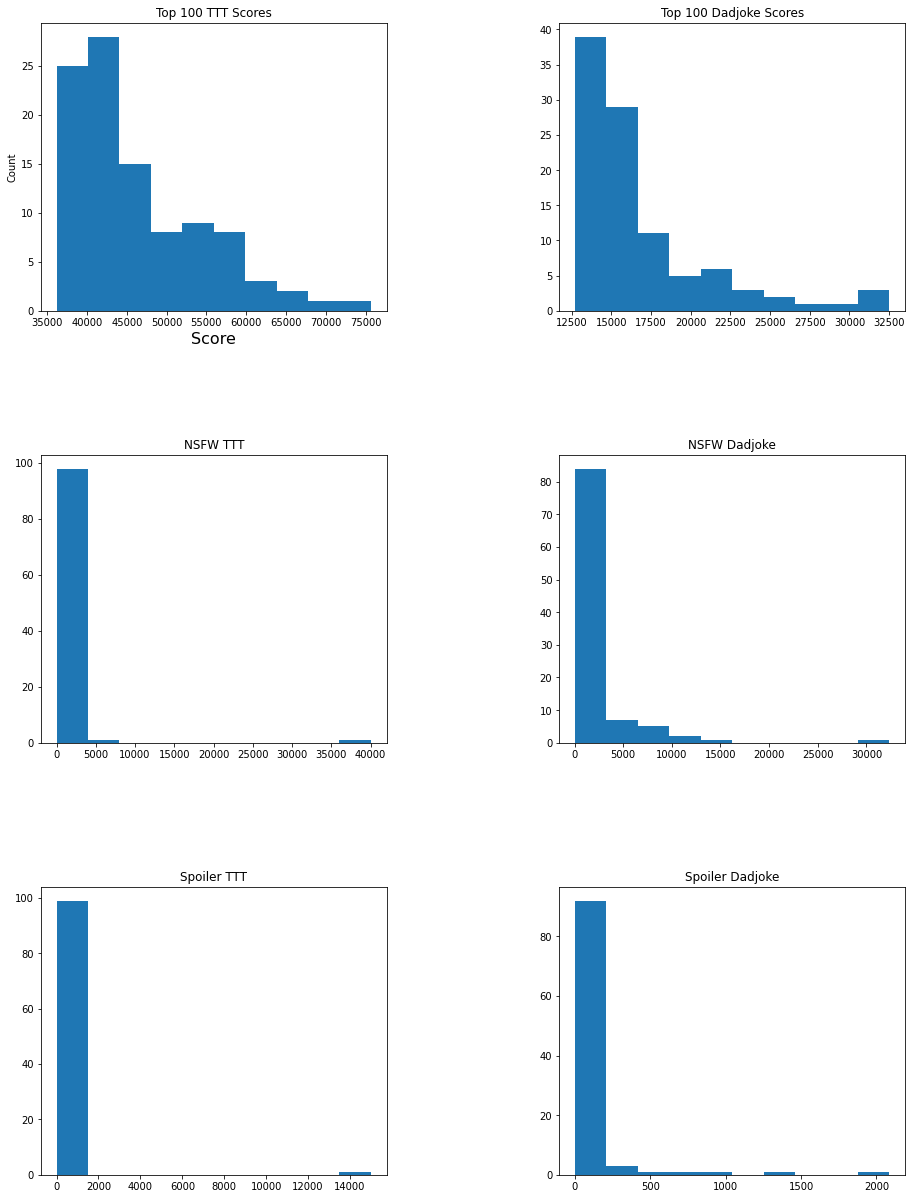

In [82]:

fig, ax = plt.subplots(ncols=2, nrows=3)
plt.subplots_adjust(left=0,right=2,top=4,bottom=0,wspace=0.5,hspace=0.5)
ax[0,0].hist(bear_data1['score'])
ax[0,0].title.set_text('Top 100 TTT Scores')
ax[0,0].set_xlabel('Score', fontsize=16)
ax[0,0].set_ylabel('Count')

ax[1,0].hist(bear_data2['score'])
ax[1,0].title.set_text('NSFW TTT')

ax[2,0].hist(bear_data3['score'])
ax[2,0].title.set_text('Spoiler TTT')

ax[0,1].hist(dada_base1['score'])
ax[0,1].title.set_text('Top 100 Dadjoke Scores')

ax[1,1].hist(dada_base2['score'])
ax[1,1].title.set_text('NSFW Dadjoke')

ax[2,1].hist(dada_base3['score'])
ax[2,1].title.set_text('Spoiler Dadjoke');

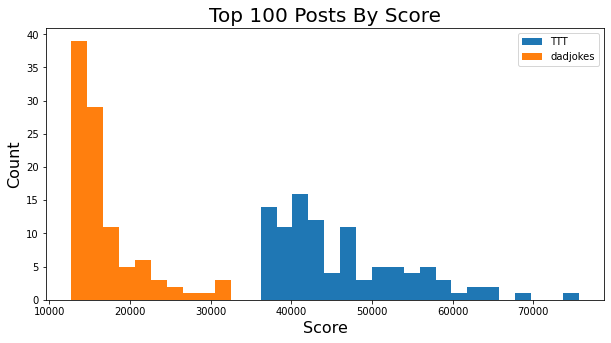

In [83]:
fig, ax = plt.subplots(figsize=(10,5))
#plt.subplots_adjust(left=0,right=2,top=4,bottom=0,wspace=0.5,hspace=0.5)
ax.hist(bear_data1['score'], bins =20)
ax.set_title('Top 100 Posts By Score', size=20)
ax.set_xlabel('Score', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(dada_base1['score'])
ax.legend(['TTT','dadjokes']);

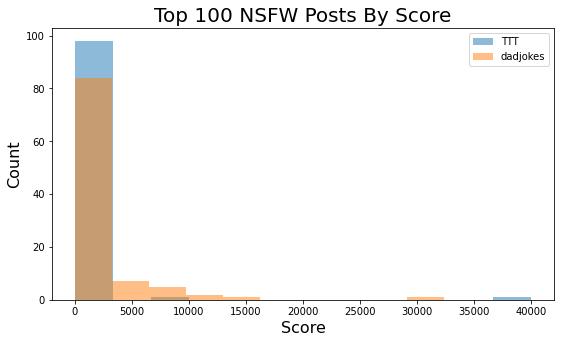

In [84]:
fig, ax = plt.subplots(figsize=(9,5))
#plt.subplots_adjust(left=0,right=2,top=4,bottom=0,wspace=0.5,hspace=0.5)
ax.hist(bear_data2['score'], bins = 12, alpha=0.5)
ax.set_title('Top 100 NSFW Posts By Score', size=20)
ax.set_xlabel('Score', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(dada_base2['score'], alpha=0.5)
ax.legend(['TTT','dadjokes']);

Surprisingly, the average top NSFW posts from r/dadjokes seem to do better than those from TTT.

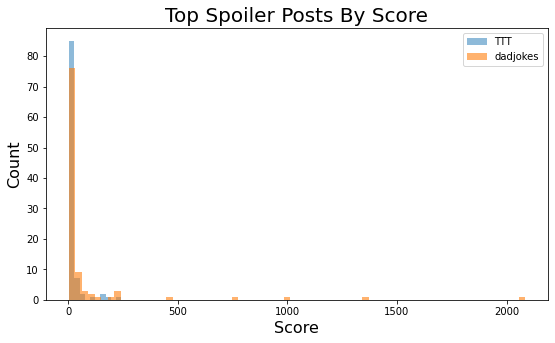

In [85]:
fig, ax = plt.subplots(figsize=(9,5))
#plt.subplots_adjust(left=0,right=2,top=4,bottom=0,wspace=0.5,hspace=0.5)
ax.hist(bear_data3[bear_data3['score']<14000]['score'], alpha=0.5)
ax.set_title('Top Spoiler Posts By Score', size=20)
ax.set_xlabel('Score', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(dada_base3['score'], bins = 70, alpha=0.6)
ax.legend(['TTT','dadjokes']);

Here we see that while spoiler posts do not tend to do well at either dadjokes or TTT, those at TTT tends to have much greater outliers.

In [86]:
bear_data3[bear_data3['score']>14000]

,all_awardings,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,can_mod_post,contest_mode,...,is_created_from_ads_ui,author_flair_background_color,author_flair_template_id,author_flair_text_color,og_description,og_title,media,media_embed,secure_media,secure_media_embed
0,[],sir_tonberry,None,[],None,text,t2_26bhr1uc,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
bear_data3.iloc[0, :]['full_link']

'https://www.reddit.com/r/technicallythetruth/comments/bqsuzy/dont_open_its_a_spoiler/'

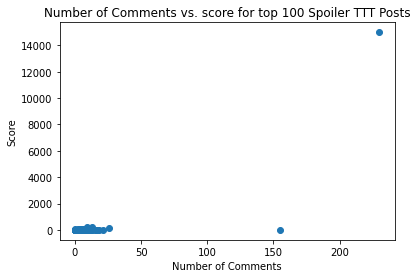

In [238]:
plt.scatter(bear_data3['num_comments'],bear_data3['score']);
plt.title('Number of Comments vs. score for top 100 Spoiler TTT Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Score');

With one exception, spoiler posts do not appear to score well on TTT.

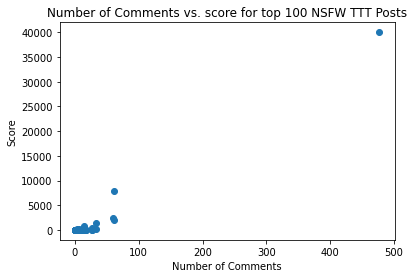

In [239]:
plt.scatter(bear_data2['num_comments'],bear_data2['score'])
plt.title('Number of Comments vs. score for top 100 NSFW TTT Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Score');

Perhaps surprisingly, there is a far outlier in terms of NSFW score and comments. This is due to the most popular post on the subreddit being NSFW. If we exclude that post from consideration (e.g. by filtering out values with a socre of more than 10_000), we find the following graph.

In [90]:
bear_data2_filtered = bear_data2[bear_data2['score']<10000]

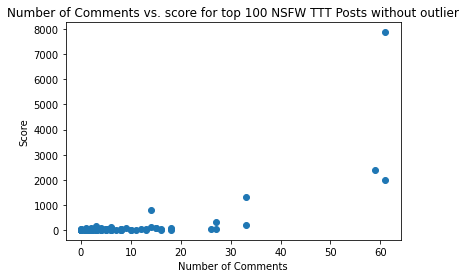

In [286]:
plt.scatter(bear_data2_filtered['num_comments'],bear_data2_filtered['score']);
plt.title('Number of Comments vs. score for top 100 NSFW TTT Posts without outlier')
plt.xlabel('Number of Comments')
plt.ylabel('Score');

Even amongst this data, there are still a number of outliers, however, it is clear that the vast majority of NSFW post gain few comments and only a small score.

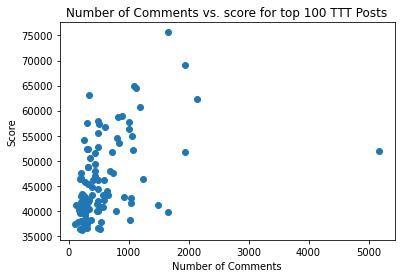

In [235]:
plt.scatter(bear_data1['num_comments'],bear_data1['score']);
plt.title('Number of Comments vs. score for top 100 TTT Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Score');

In [93]:
bear_data1[bear_data1['num_comments']>5000]['full_link'][24]

'https://www.reddit.com/r/technicallythetruth/comments/hv5cvb/technically_a_chair/'

The outlier here is a post with over 5000 comments. This is a repost from Tumblr and an inspection of the comments show that this post, dealing with both a technical truth and subtle gender issue, could have garnered more discussion than most other posts of that score.

Removing this outlier using filtering, we can better capture the relationship betweeen comments and upvotes on TTT.

In [94]:
bear_data1_filtered = bear_data1[bear_data1['num_comments']<5000]

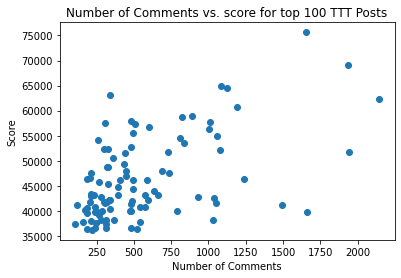

In [236]:
plt.scatter(bear_data1_filtered['num_comments'], bear_data1_filtered['score']);
plt.title('Number of Comments vs. score for top 100 TTT Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Score');

High scoring posts in this subreddit tend to have much higher scores than ones in the dadjoke reddit.

Doing the same analysis for dadjoke's posts, we see the following.

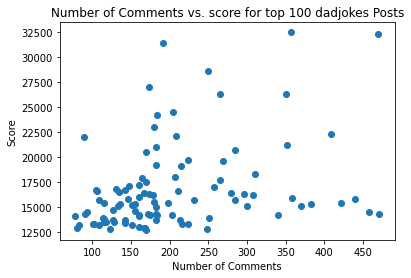

In [229]:
plt.scatter(dada_base1['num_comments'],dada_base1['score']);
plt.title('Number of Comments vs. score for top 100 dadjokes Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Score');

This graph is strikingly similar to the TTT graph.

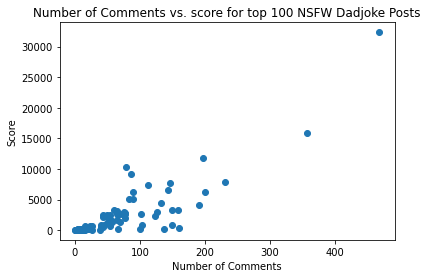

In [233]:
plt.scatter(dada_base2['num_comments'],dada_base2['score']);
plt.title('Number of Comments vs. score for top 100 NSFW Dadjoke Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Score');

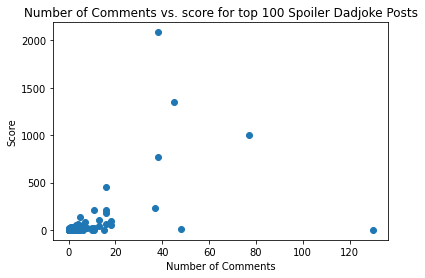

In [234]:
plt.scatter(dada_base3['num_comments'],dada_base3['score'])
plt.title('Number of Comments vs. score for top 100 Spoiler Dadjoke Posts')
plt.xlabel('Number of Comments')
plt.ylabel('Score');

Here it seems the dadjoke reddit does not tend to like posts tagged spoiler. There are only 5 posts with scores over 500. Some of the lower scoring posts have been deleted.

## Data Cleaning

The easiest way to judge how much cleaning our data needs is to use the `is_self` paremeter.

Based on some experimentation, I found that `is_self` seems to mean that the post uses purely text and does not have embedded images or videos. There is a pretty strong split between the two reddits as to which type of post they prefer.

In [99]:
has_selftext1 = dada_base1['is_self'].value_counts(normalize=True)[True]
has_selftext2 = dada_base2['is_self'].value_counts(normalize=True)[True]
has_selftext3 = dada_base3['is_self'].value_counts(normalize=True)[True]

has_selftext1, has_selftext2, has_selftext3

(0.97, 1.0, 0.99)

We see that 97% of the top 100 posts by score are purely text based. 100% of the top 100 NSFW posts are also purely text based and 99% of the spoiler posts are aslo purely text based. Compare this to TTT below

In [100]:
has_selftext1 = bear_data1['is_self'].value_counts(normalize=True)[False]
has_selftext2 = bear_data2['is_self'].value_counts(normalize=True)[False]
has_selftext3 = bear_data3['is_self'].value_counts(normalize=True)[False]

has_selftext1, has_selftext2, has_selftext3

(1.0, 0.94, 0.95)

Here we see that 100\% of the top 100 TTT posts used images of other media in lieu of text, meanwhile 94% of the NSFW posts and 95% of the spoiler posts also used embedded media in place of text. What this means is two-fold.

1) The TTT data will need to be cleaned before it can be used in a natural language processor.
2) A naive, yet very accurate classifier of posts could merely guess that a post is from dadjokes if `is_self` is `True` and guess that a post is TTT if `is_self` is `False`. While such a model scores very well, it is not in the spirit of trying to classify these posts based on content

So, we proceed to deal with point 1 by using `pytesseract` for optical character recognition.

In [101]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\chris\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
# https://pypi.org/project/pytesseract/ is how I found to do this.

In [102]:
from urllib.request import urlretrieve

Before applying pytesseract to our reddit posts, we would like to check that they actually contain live images rather than broken links or videos. This is a two step process and we isolate the embedded videos first.

In [103]:
data_frame_dict = {'dada_base1' : dada_base1, 
                   'dada_base2' : dada_base2, 
                   'dada_base3' : dada_base3, 
                   'bear_data1' : bear_data1, 
                   'bear_data2' : bear_data2, 
                   'bear_data3' : bear_data3
                  }

In [104]:
for name in data_frame_dict.keys():
    try:
        data_frame = data_frame_dict[name]
        data_frame['media'].isna().sum() #The values that are not NA have videos rather than images and should be ommitted.
    except:
        print(f'{name} has only images and/or text')

dada_base1 has only images and/or text
dada_base2 has only images and/or text
dada_base3 has only images and/or text
bear_data1 has only images and/or text


This shows that only the NSFW and Spoiler TTT data sets have embedded videos. Focusing on these two, we find:

In [105]:
bear_data2['media'].isna().sum(), bear_data3['media'].isna().sum()

(99, 99)

Hence, only one of each contains a video rather than text and images. While we can find these values below, since there are only two of them, we choose not to drop them.

In [106]:
bear_data2[~(bear_data2['media'].isna())].index

Int64Index([45], dtype='int64')

In [107]:
bear_data3[~(bear_data3['media'].isna())].index

Int64Index([75], dtype='int64')

Now, our data sets are ready for part 2 of the cleaning. We need to convert any working image links to text.

In [109]:
from PIL import Image
import numpy as np

In [110]:
text_dict = {name: [] for name in data_frame_dict.keys()}
for name in data_frame_dict.keys():
    df=data_frame_dict[name]
    for i in range(len(df)):
        try:
            img = urlretrieve(df['url'][i], 'image.png')
            text = pytesseract.image_to_string(Image.open('image.png'))
            text_dict[name].append(text)
        except:
            text_dict[name].append(np.nan) #This is so that we can fill out our column without worrying about indices

In [111]:
#text_dict['bear_data2'].append(np.nan)
#text_dict['bear_data3'].append(np.nan) #whoops!

In [136]:
df_messy = pd.DataFrame(text_dict)
df_messy.head(2)

,dada_base1,dada_base2,dada_base3,bear_data1,bear_data2,bear_data3
0,NaN,NaN,NaN,q_stalinchristmasspecial\n\nReville longbottom...,\n,\n
1,NaN,NaN,NaN,PEO\n\n \n \n\n= Telling a dangerously\noverw...,\n,\n\n(ws. SPOILER\n\n® %\n


In [114]:
dada_base1['mess_text']=df_messy['dada_base1']
dada_base2['mess_text']=df_messy['dada_base2']
dada_base3['mess_text']=df_messy['dada_base3']
bear_data1['mess_text']=df_messy['bear_data1']

In [115]:
bear_data2['mess_text']=df_messy['bear_data2'][:98]

(bear_data2['selftext']=='').value_counts()

bear_data2.shape

empty_subframe=bear_data2[bear_data2['mess_text']==np.nan]

empty_subframe['mess_text']=empty_subframe['selftext']

#bear_data2['mess_text'][6]

In [116]:
bear_data3['mess_text']=df_messy['bear_data3'][:98]

(bear_data3['selftext']=='').value_counts()

bear_data3.shape

empty_subframe2=bear_data3[bear_data3['mess_text']==np.nan]

empty_subframe['mess_text']=empty_subframe['selftext']

#bear_data3['mess_text'][6]

In [117]:
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
blood_sweat_and_tears1 = bear_data1[['title','mess_text','subreddit']].replace(np.nan, '')
blood_sweat_and_tears2 = bear_data2[['title','mess_text','subreddit']].replace(np.nan, '')
blood_sweat_and_tears3 = bear_data3[['title','mess_text','subreddit']].replace(np.nan, '')

In [121]:
#Initialize our CountVectorizer
c_vec = CountVectorizer(stop_words='english')

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [123]:
prep_data = dada_base1[['title','selftext']]
prep_data.columns = ['title', 'mess_text']

In [164]:
X=pd.concat([blood_sweat_and_tears1.drop(columns='subreddit'), prep_data[['title','mess_text']]])
X.head(2)

,title,mess_text
0,Do you agree? Was he the main character all al...,q_stalinchristmasspecial\n\nReville longbottom...
1,In a way?,PEO\n\n \n \n\n= Telling a dangerously\noverw...


In [167]:
X.reset_index(inplace=True)

In [169]:
y=pd.concat([
    pd.DataFrame(np.full_like(blood_sweat_and_tears1['title'],0)), 
    pd.DataFrame(np.full_like(blood_sweat_and_tears1['title'],1))]) 

In [170]:
y=y.squeeze().astype(int)

In [181]:
y.index = y.reset_index().index #Pandas Series aren't as easy to reset the index of

In [183]:
X.index, y.index

(RangeIndex(start=0, stop=200, step=1), RangeIndex(start=0, stop=200, step=1))

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state = 42)

In [197]:
X_train_transformed = pd.DataFrame(c_vec.fit_transform(X_train['mess_text']).toarray(), columns = c_vec.get_feature_names())
X_test_transformed = pd.DataFrame(c_vec.transform(X_test['mess_text']).toarray(), columns = c_vec.get_feature_names())

C:\Users\chris\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [198]:
logreg = LogisticRegression()

In [199]:
logreg.fit(X_train_transformed,y_train)

LogisticRegression()

The feature importances can be seen below:

In [258]:
coefficients = pd.DataFrame( logreg.coef_[0], X_train_transformed.drop(columns=['title_word_count','title_length']).columns)

In [259]:
coefficients.head()

,0
02,-0.114059
03,-0.132932
04,-0.022964
07,-0.097610
0k,-0.038910


In [261]:
coefficients.reset_index(inplace=True)

In [262]:
coefficients.columns=['features','coefficients']

In [263]:
coefficients.sort_values(by = 'coefficients')

,features,coefficients
437,filter,-0.664173
617,like,-0.652058
885,share,-0.625322
782,pm,-0.614208
818,read,-0.599365
...,...,...
915,son,0.387697
312,dad,0.402237
581,know,0.443879
832,replied,0.497548


The 5 most correlated terms with dadjokes are: removed, replied, know, dad, and son. These last two are not so surprising, but it is interesting that "removed" is so high up. "replied" makes some sense due to dadjokes often having the punchline to a joke in their selftext. 

The 5 most correlated terms with technicallythetruth posts are filter, like, share, pm and read. All of which are likely artifacts of posts being screenshots from reddit, Tumblr and Twitter.

### Explanation of LogOdds

Note, the coefficients of a logistic regression are log odds. Meaning the logarithm of the probability that the event occurs over the probability that the event does not occur. Some important properties of logarithms are that
1) $\text{log}(x)$ is a strictly increasing function of $x$.
2) $\text{log}(x)>0$ for $x>1$ and $\text{log}(x)<0$ for $x<1$.  

In particular, high positive and high negative values mean strong predictors since they represent a strong imbalance between the probability an event occurs and the probability of the complementary event.

In [201]:
logreg.score(X_test_transformed, y_test)

0.66

This is a $16\%$ improvement over the baseline $50\%$.

But, for a more relevant baseline, we engineer two new features: title length and title word count.

In [209]:
X_train_transformed['title_length'] = X_train['title'].str.len()
X_train_transformed['title_word_count'] = X_train['title'].str.split().str.len()


X_test_transformed['title_length'] = X_test['title'].str.len()
X_test_transformed['title_word_count'] = X_test['title'].str.split().str.len()


In [264]:
from sklearn.preprocessing import StandardScaler

In [274]:
ss = StandardScaler()

In [275]:
X_train_scaled = ss.fit_transform(X_train_transformed.loc[:, ['title_length', 'title_word_count']].replace(np.nan, 0))

In [276]:
X_test_scaled = ss. transform(X_test_transformed.loc[:, ['title_length', 'title_word_count']].replace(np.nan, 0))

With this in mind, we can create a new regression model on just these features.

In [277]:
logreg2 = LogisticRegression()
logreg2.fit(X_train_scaled,y_train)
logreg2.score(X_test_scaled, y_test)

0.48

This model preformed worse than the baseline. So, not only is our NLP model uncovering new insights about the data, it cannot be easily replaced by another simple model.

### Confusion Matrices and Conclusion

For distinguishing between dadjokes and TTT posts, on behalf of TTT, we are particularly interested in avoiding misclassifying TTT posts as dadjokes. The following confusion matrices serve as a good guide as to how we are doing in this regard.

In [217]:
preds = logreg.predict(X_test_transformed.drop(columns=['title_length','title_word_count']))

In [219]:
preds2 = logreg2.predict(X_test_transformed.loc[:,['title_length','title_word_count']].replace(np.nan, 0))

In [220]:
from sklearn.metrics import ConfusionMatrixDisplay

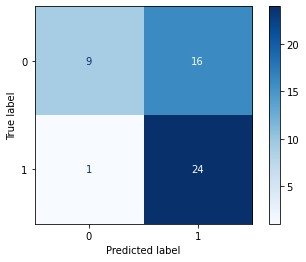

In [222]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test_transformed.drop(columns = ['title_length', 'title_word_count']), y_test, cmap='Blues');

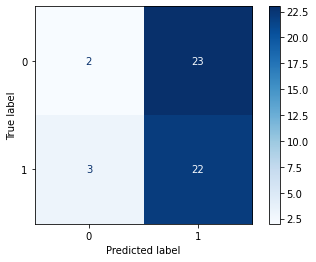

In [224]:
ConfusionMatrixDisplay.from_estimator(logreg2, X_test_transformed.loc[:,['title_length', 'title_word_count']].replace(np.nan,0), y_test, cmap='Blues');

On the test set, our model has a lot of false positives. I.e. A lot of TTT posts are misclassified as being dadjokes.

While it seems that NLP can be used to distingiush some TTT posts from dadjokes, many TTT posts still have a lot of similarities to dadjokes. So, while dadjokes and TTT have different missions, they appear to use similar language.